# T-cell annotations by Zhang et al., EG36

Sample description:
- Aplastic anemia
- BM blasts = 0 %

### Reference:

Zhang, L., Yu, X., Zheng, L., Zhang, Y., Li, Y., Fang, Q., Gao, R., Kang, B., Zhang, Q., Huang, J. Y., Konno, H., Guo, X., Ye, Y., Gao, S., Wang, S., Hu, X., Ren, X., Shen, Z., Ouyang, W., & Zhang, Z. (2018). Lineage tracking reveals dynamic relationships of T cells in colorectal cancer. Nature, 564(7735), 268–272. https://doi.org/10.1038/s41586-018-0694-x

In the study conducted by Zhang et al. CD8+ T-cells, CD4+CD25-/int T-helper cells, CD4+CD25high Treg cells were sorted using FACS. According to their study, in total of 8 CD8+ clusters and 12 CD4+ clusters identified. 

Identified CD8+ T-cell clusters were: naive (tn), central memory (cm), effector memory (em), recently activated effector memory (emra), tissue-resident memory (rm), intraepithelial lymphocytes (IEL), dysfunctional/exhausted (tex) and mucosal-associated invariant T (MAIT). 

Identified CD4+ clusters were: naive (tn), central memory (tcm_n), recently activated effector memory (emra), tissue-resident memory (trm), follicular helper (tfh), helpet type 1, helper type 17, helper type 1 like, blood regulatory (treg_blood),follicular regulatory (tfr) and tumor-infiltrating regulatory (treg_tum). 

CD8+ markers:

- cd8_tn=["CCR7", "LEF1", "SELL", "TCF7", "CD27", "CD28", "S1PR1"] 
- cd8_cm=["CCR7", "SELL", "IL7R", "CD27", "CD28", "PRF1", "GZMA", "CCL5", "GPR183", "S1PR1"]
- cd8_em=["GZMK", "CXCR4", "CXCR3", "CD44"]
- cd8_emra=["KLRG1", "CX3CR1", "FCGR3A", "FGFBP2", "PRF1", "GZMH", "TBX21", "EOMES", "S1PR1", "S1PR5"]
- cd8_rm=["CD6", "XCL1", "XCL2", "MYADM", "CAPG", "RORA", "NR4A1", "NR4A2", "NR4A3", "CD69", "ITGAE"]
- cd8_IEL=["CD160", "KIR2DL4", "TMIGD2", "KLRC1", "KLRC2", "KLRC3", "NR4A1", "NR4A2", "NR4A3", "IKZF2", "ENTPD1", "CD69", "ITGAE"]
- cd8_tex=["HAVCR2", "PDCD1", "LAYN", "TOX", "IFNG", "GZMB", "MIR155HG", "TNFRSF9", "ITGAE"]
- cd8_mait=["SLC4A10", "KLRB1", "ZBTB16", "NCR3", "RORC", "RORA"]

CD4+ markers:

- cd4_tn= ["CCR7", "LEF1", "SELL", "TCF7", "CD27", "CD28", "S1PR1"]
- cd4_tcm_n=["CCR7", "SELL", "PTGER2", "ICAM2", "ANXA1", "ANXA2", "S1PR1"]
- cd4_emra=["KLRG1", "CX3CR1", "NKG7", "PRF1", "GNLY", "GZMH", "TBX21", "CTSW", "S1PR1", "S1PR5"]
- cd4_tcm_n=["CCR7", "TCF7", "RGS1", "CD69"]
- cd4_trm=["CD69", "KLRB1", "PTGER4", "IL7R", "CXCR6",  "NR4A1", "NR4A2", "NR4A3", "MYADM"]
- cd4_tfh=["CXCR5", "BCL6", "ICA1", "TOX", "TOX2", "IL6ST", "MAGEH1", "BTLA", "ICOS", "PDCD1", "CD200"]
- cd4_th1=["GZMK", "GZMA", "CCL5", "IFNG", "RUNX3", "EOMES", "CXCR3", "CXCR4", "CD44"]
- cd4_th17=["IL23R", "RORC", "FURIN", "CTSH", "CCR6", "KLRB1", "CAPG", "ITGAE"]
- cd4_th1_like=["IFNG", "CXCR3", "BHLHE40", "GZMB", "PDCD1", "HAVCR2", "ICOS", "IGFLR1", "ITGAE"]
- cd4_treg_blood=["FOXP3", "IL2RA", "IL10RA", "IKZF2", "RTKN2", "CDC25B", "S1PR4"]
- cd4_tfr=["FOXP3", "IL2RA", "CXCR5", "PDCD1", "IL10", "CCR4", "CD69"]
- cd4_treg_tum=["FOXP3", "CCR8", "TNFRSF18", "LAYN", "TNFRSF9", "IKZF2", "RTKN2", "CTLA4", "BATF", "IL21R"]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')


Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#all datasets
adata_all = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')


In [3]:
#select sample

adata_sample=adata_all[adata_all.obs['eg_code'] == 'EG36']

In [4]:
adata_nkt=adata_sample[adata_sample.obs['cell_type'] == 'NKT']

In [5]:
adata_nkt.copy()

AnnData object with n_obs × n_vars = 1585 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [6]:
adata_sample

View of AnnData object with n_obs × n_vars = 2169 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [7]:
adata_nkt.var_names

Index(['FAM41C', 'NOC2L', 'ISG15', 'C1orf159', 'SDF4', 'B3GALT6', 'UBE2J2',
       'ACAP3', 'PUSL1', 'AURKAIP1',
       ...
       'IKBKG', 'GAB3', 'DKC1', 'MPP1', 'F8A1', 'FUNDC2', 'BRCC3', 'VBP1',
       'TMLHE', 'VAMP7'],
      dtype='object', length=8051)

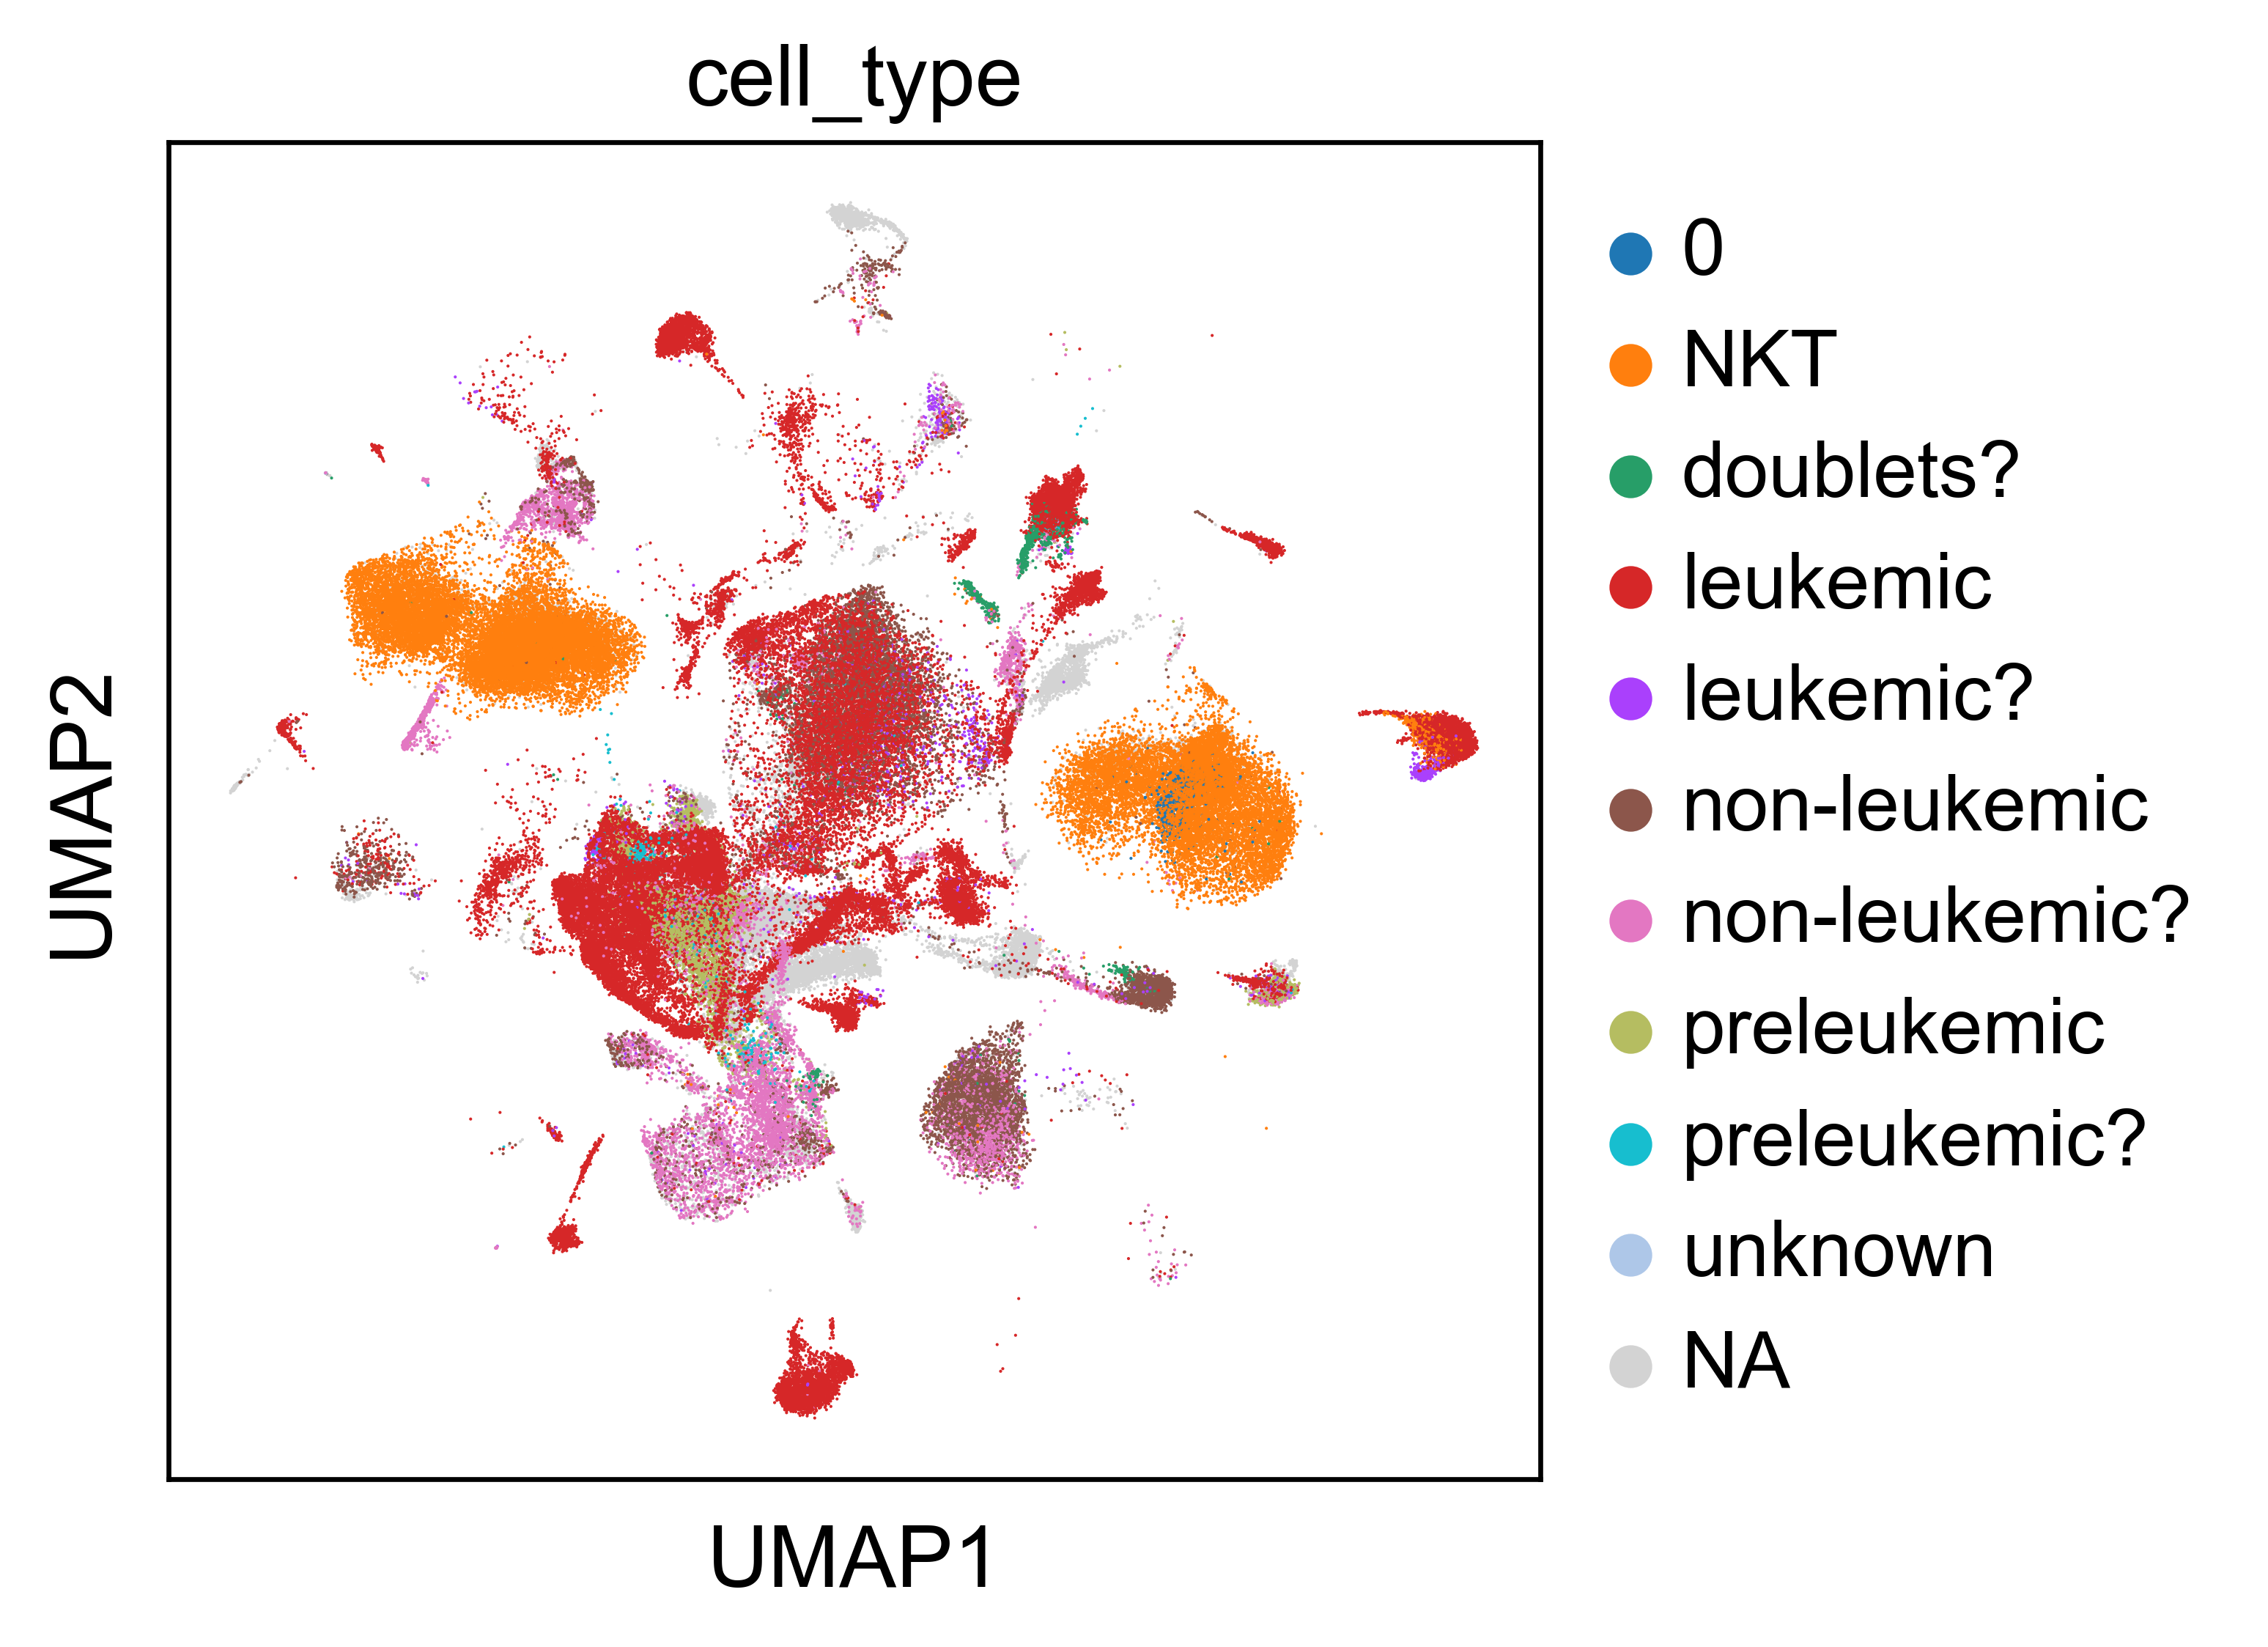

In [8]:
#Whole easigenomics dataset
sc.settings.set_figure_params(dpi=300)
sc.pl.umap(adata_all, color = ["cell_type"], color_map = 'viridis', ncols = 1)

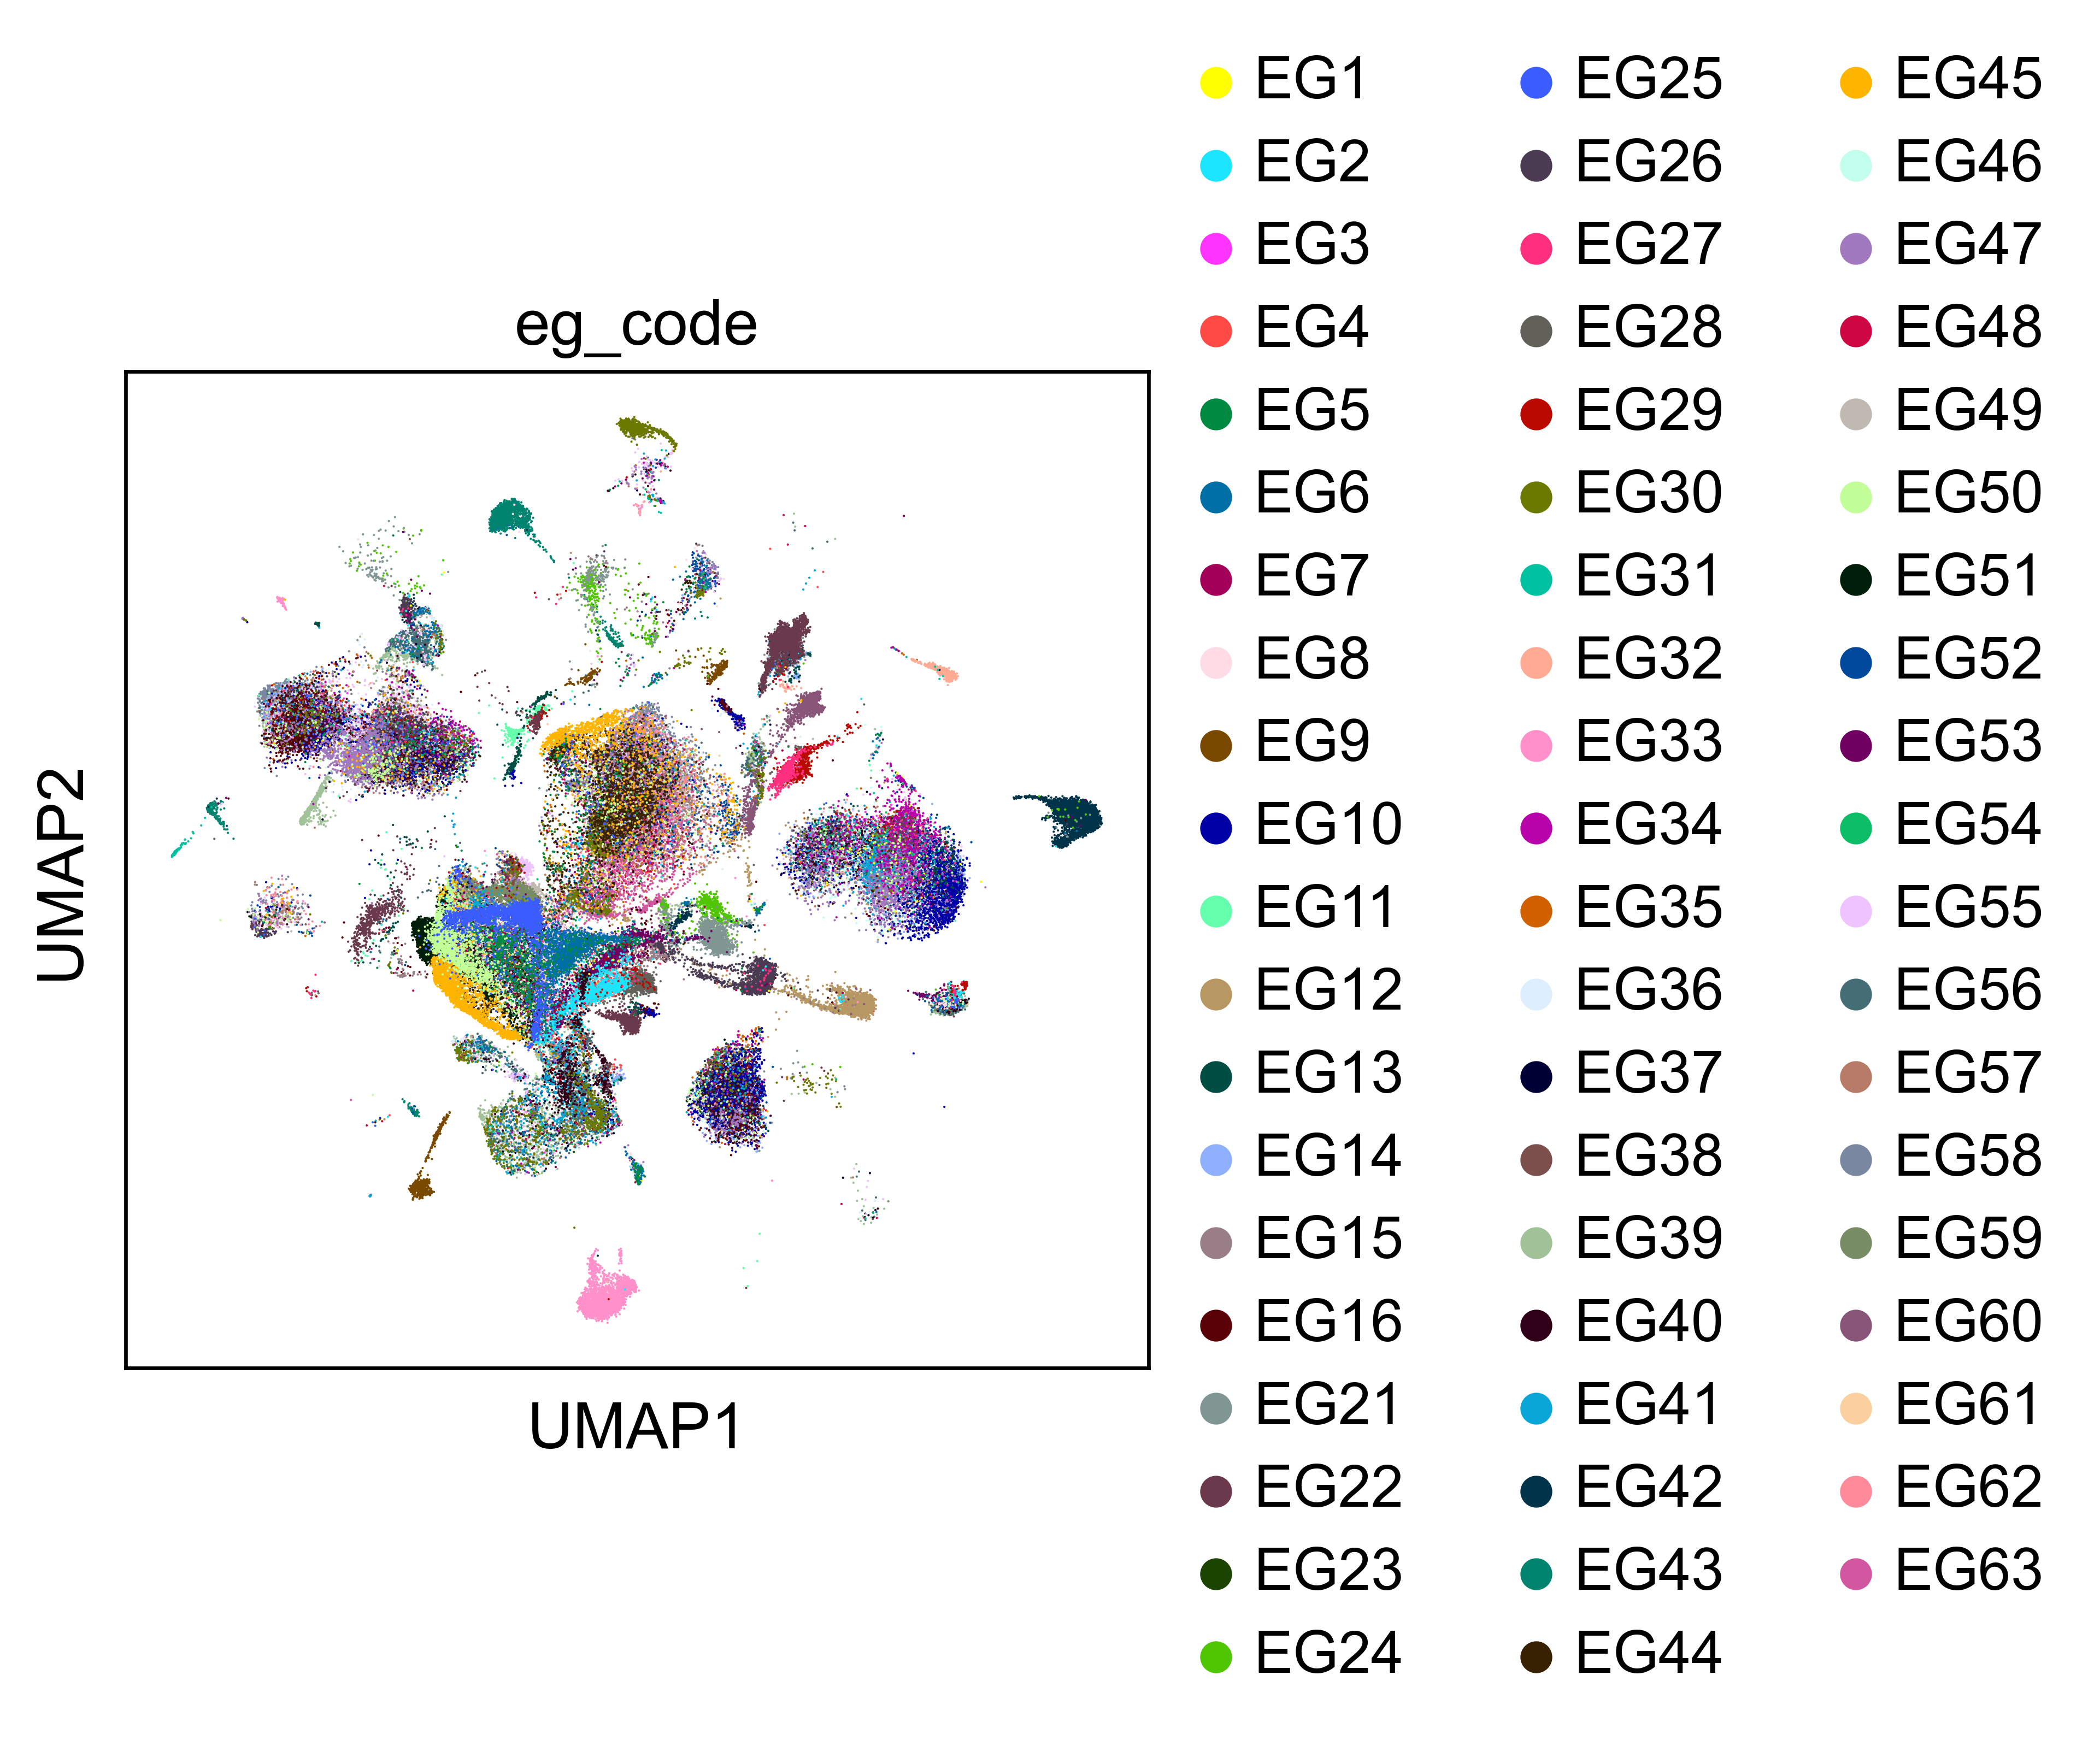

In [9]:
#Similar as above, but showing samples

sc.pl.umap(adata_all, color = ["eg_code"], color_map = 'viridis', ncols = 1)

## T-cell markers Zhang et al, Nature 2018

In [10]:
## Zhang et al, Nature 2018
cd8_tn=["CCR7", "LEF1", "SELL", "TCF7", "CD27", "CD28", "S1PR1"]
cd8_cm=["CCR7", "SELL", "IL7R", "CD27", "CD28", "PRF1", "GZMA", "CCL5", "GPR183", "S1PR1"]
cd8_emra=["KLRG1", "CX3CR1", "FCGR3A", "FGFBP2", "PRF1", "GZMH", "TBX21", "EOMES", "S1PR1", "S1PR5"]
cd8_em=["GZMK", "CXCR4", "CXCR3", "CD44"]
cd8_rm=["CD6", "XCL1", "XCL2", "MYADM", "CAPG", "RORA", "NR4A1", "NR4A2", "NR4A3", "CD69", "ITGAE"]
cd8_IEL=["CD160", "KIR2DL4", "TMIGD2", "KLRC1", "KLRC2", "KLRC3", "NR4A1", "NR4A2", "NR4A3", "IKZF2", "ENTPD1", "CD69", "ITGAE"]
cd8_tex=["HAVCR2", "PDCD1", "LAYN", "TOX", "IFNG", "GZMB", "MIR155HG", "TNFRSF9", "ITGAE"]
cd8_mait=["SLC4A10", "KLRB1", "ZBTB16", "NCR3", "RORC", "RORA"]


### CD8+ markers

In [11]:
listOfGenes = cd8_tn
cd8_tn_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd8_tn_markers.append(x)
    else:
        print(x, "No") 
        

CCR7 Yes
LEF1 Yes
SELL Yes
TCF7 Yes
CD27 No
CD28 No
S1PR1 Yes


In [12]:
listOfGenes = cd8_cm
cd8_cm_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd8_cm_markers.append(x)
    else:
        print(x, "No") 

CCR7 Yes
SELL Yes
IL7R Yes
CD27 No
CD28 No
PRF1 No
GZMA No
CCL5 Yes
GPR183 Yes
S1PR1 Yes


In [13]:
listOfGenes = cd8_emra
cd8_emra_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd8_emra_markers.append(x)
    else:
        print(x, "No") 

KLRG1 No
CX3CR1 No
FCGR3A No
FGFBP2 No
PRF1 No
GZMH No
TBX21 No
EOMES No
S1PR1 Yes
S1PR5 No


In [14]:
listOfGenes = cd8_em
cd8_em_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd8_em_markers.append(x)
    else:
        print(x, "No") 

GZMK No
CXCR4 Yes
CXCR3 No
CD44 No


In [15]:
listOfGenes = cd8_rm
cd8_rm_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd8_rm_markers.append(x)
    else:
        print(x, "No") 

CD6 No
XCL1 No
XCL2 No
MYADM Yes
CAPG Yes
RORA Yes
NR4A1 No
NR4A2 Yes
NR4A3 No
CD69 No
ITGAE Yes


In [16]:
listOfGenes = cd8_IEL
cd8_IEL_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd8_IEL_markers.append(x)
    else:
        print(x, "No") 

CD160 No
KIR2DL4 No
TMIGD2 Yes
KLRC1 No
KLRC2 No
KLRC3 No
NR4A1 No
NR4A2 Yes
NR4A3 No
IKZF2 Yes
ENTPD1 No
CD69 No
ITGAE Yes


In [17]:
listOfGenes = cd8_tex
cd8_tex_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd8_tex_markers.append(x)
    else:
        print(x, "No") 

HAVCR2 No
PDCD1 No
LAYN No
TOX Yes
IFNG No
GZMB Yes
MIR155HG Yes
TNFRSF9 No
ITGAE Yes


In [18]:
listOfGenes = cd8_mait
cd8_mait_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd8_mait_markers.append(x)
    else:
        print(x, "No") 

SLC4A10 No
KLRB1 No
ZBTB16 No
NCR3 No
RORC No
RORA Yes


### CD4+ markers

In [19]:
cd4_tn= ["CCR7", "LEF1", "SELL", "TCF7", "CD27", "CD28", "S1PR1"]
cd4_tcm_n=["CCR7", "SELL", "PTGER2", "ICAM2", "ANXA1", "ANXA2", "S1PR1"]
cd4_emra=["KLRG1", "CX3CR1", "NKG7", "PRF1", "GNLY", "GZMH", "TBX21", "CTSW", "S1PR1", "S1PR5"]
#cd4_tcm_n=["CCR7", "TCF7", "RGS1", "CD69"]
cd4_trm=["CD69", "KLRB1", "PTGER4", "IL7R", "CXCR6",  "NR4A1", "NR4A2", "NR4A3", "MYADM"]
cd4_tfh=["CXCR5", "BCL6", "ICA1", "TOX", "TOX2", "IL6ST", "MAGEH1", "BTLA", "ICOS", "PDCD1", "CD200"]
cd4_th1=["GZMK", "GZMA", "CCL5", "IFNG", "RUNX3", "EOMES", "CXCR3", "CXCR4", "CD44"]
cd4_th17=["IL23R", "RORC", "FURIN", "CTSH", "CCR6", "KLRB1", "CAPG", "ITGAE"]
cd4_th1_like=["IFNG", "CXCR3", "BHLHE40", "GZMB", "PDCD1", "HAVCR2", "ICOS", "IGFLR1", "ITGAE"]
cd4_treg_blood=["FOXP3", "IL2RA", "IL10RA", "IKZF2", "RTKN2", "CDC25B", "S1PR4"]
cd4_tfr=["FOXP3", "IL2RA", "CXCR5", "PDCD1", "IL10", "CCR4", "CD69"]
cd4_treg_tum=["FOXP3", "CCR8", "TNFRSF18", "LAYN", "TNFRSF9", "IKZF2", "RTKN2", "CTLA4", "BATF", "IL21R"]

In [20]:
listOfGenes = cd4_tn
cd4_tn_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_tn_markers.append(x)
    else:
        print(x, "No") 

CCR7 Yes
LEF1 Yes
SELL Yes
TCF7 Yes
CD27 No
CD28 No
S1PR1 Yes


In [21]:
listOfGenes = cd4_tcm_n
cd4_tcm_n_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_tcm_n_markers.append(x)
    else:
        print(x, "No") 

CCR7 Yes
SELL Yes
PTGER2 Yes
ICAM2 Yes
ANXA1 Yes
ANXA2 Yes
S1PR1 Yes


In [22]:
listOfGenes = cd4_emra
cd4_emra_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_emra_markers.append(x)
    else:
        print(x, "No") 

KLRG1 No
CX3CR1 No
NKG7 Yes
PRF1 No
GNLY No
GZMH No
TBX21 No
CTSW Yes
S1PR1 Yes
S1PR5 No


In [23]:
listOfGenes = cd4_trm
cd4_trm_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_trm_markers.append(x)
    else:
        print(x, "No") 

CD69 No
KLRB1 No
PTGER4 Yes
IL7R Yes
CXCR6 No
NR4A1 No
NR4A2 Yes
NR4A3 No
MYADM Yes


In [24]:
listOfGenes = cd4_tfh
cd4_tfh_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_tfh_markers.append(x)
    else:
        print(x, "No") 

CXCR5 No
BCL6 Yes
ICA1 Yes
TOX Yes
TOX2 No
IL6ST Yes
MAGEH1 Yes
BTLA No
ICOS No
PDCD1 No
CD200 Yes


In [25]:
listOfGenes = cd4_th1
cd4_th1_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_th1_markers.append(x)
    else:
        print(x, "No") 

GZMK No
GZMA No
CCL5 Yes
IFNG No
RUNX3 Yes
EOMES No
CXCR3 No
CXCR4 Yes
CD44 No


In [26]:
listOfGenes = cd4_th17
cd4_th17_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_th17_markers.append(x)
    else:
        print(x, "No") 

IL23R No
RORC No
FURIN No
CTSH Yes
CCR6 No
KLRB1 No
CAPG Yes
ITGAE Yes


In [27]:
listOfGenes = cd4_th1_like
cd4_th1_like_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_th1_like_markers.append(x)
    else:
        print(x, "No") 

IFNG No
CXCR3 No
BHLHE40 Yes
GZMB Yes
PDCD1 No
HAVCR2 No
ICOS No
IGFLR1 Yes
ITGAE Yes


In [28]:
listOfGenes = cd4_treg_blood
cd4_treg_blood_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_treg_blood_markers.append(x)
    else:
        print(x, "No") 

FOXP3 No
IL2RA No
IL10RA Yes
IKZF2 Yes
RTKN2 Yes
CDC25B Yes
S1PR4 Yes


In [29]:
listOfGenes = cd4_tfr
cd4_tfr_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_tfr_markers.append(x)
    else:
        print(x, "No") 

FOXP3 No
IL2RA No
CXCR5 No
PDCD1 No
IL10 No
CCR4 No
CD69 No


In [30]:
listOfGenes = cd4_treg_tum
cd4_treg_tum_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        print(x, "Yes")
        cd4_treg_tum_markers.append(x)
    else:
        print(x, "No") 

FOXP3 No
CCR8 No
TNFRSF18 No
LAYN No
TNFRSF9 No
IKZF2 Yes
RTKN2 Yes
CTLA4 No
BATF Yes
IL21R No


In [31]:
#All CD8+ T-cell markers
zhang_cd8_markers=[cd8_tn, cd8_cm, cd8_emra, cd8_em, cd8_rm, cd8_IEL, cd8_tex, cd8_mait]

#All CD4+ T-cell markers
zhang_cd4_markers=[cd4_tn, cd4_tcm_n, cd4_emra, cd4_tcm_n, cd4_trm, cd4_tfh, cd4_th1, cd4_th17, cd4_th1_like, cd4_treg_blood, cd4_treg_tum]

#All T-cell markers
zhang_markers=[zhang_cd8_markers, zhang_cd4_markers]

In [32]:
#Concatenate list of lists

zhang_cd8_markers = list(np.concatenate(zhang_cd8_markers).flat)
zhang_cd4_markers = list(np.concatenate(zhang_cd4_markers).flat)

In [33]:
zhang_markers = list(np.concatenate(zhang_markers).flat) #all markers

In [34]:
#zhang_cd8_markers

listOfGenes = zhang_cd8_markers
cd8_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        cd8_markers.append(x)

In [35]:
#zhang_cd4_markers

listOfGenes = zhang_cd4_markers

cd4_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        cd4_markers.append(x)


In [36]:
#Zhang genes = all the genes

zhang_markers=[]

for x in listOfGenes:
    if x in adata_nkt.var_names:
        zhang_markers.append(x)
        

## UMAPS, whole sample

- Whole sample shown in UMAP
- latent space

In [55]:
cell_type= adata_nkt.obs['cell_type']

In [38]:
latent=adata_nkt.obsm['X_totalVI']

In [39]:
#Computing a neighborhood of observations

sc.pp.neighbors(adata_nkt, use_rep="X_totalVI")   #indicated representation
sc.tl.umap(adata_nkt, min_dist=0.4)

In [40]:
#Calculate UMAPs

reducer = umap.UMAP()
embedding = reducer.fit_transform(latent)

In [41]:
#2D representation

embedding

array([[11.990683 ,  8.423193 ],
       [ 4.8474455, 10.530679 ],
       [ 6.316136 , 10.363817 ],
       ...,
       [12.294475 ,  6.613983 ],
       [ 9.223426 , 10.365062 ],
       [ 8.01465  , 12.040036 ]], dtype=float32)

In [42]:
#Only NKT cells
plt.figure(figsize=(20,15))
plt.title('UMAP, only NKT cells', fontsize=30)
plt.scatter(embedding[:, 0], embedding[:, 1], s=0.8)

In [43]:
#All cell types

latent1=adata_sample.obsm['X_totalVI']

In [44]:
#Computing a neighborhood of observations

sc.pp.neighbors(adata_sample, use_rep="X_totalVI")   #indicated representation
sc.tl.umap(adata_sample, min_dist=0.4)

In [45]:
#Calculate UMAPs

reducer = umap.UMAP()
embedding = reducer.fit_transform(latent1)

In [46]:
#All cell types
plt.figure(figsize=(20,15))
plt.title('UMAP, all cell types', fontsize=30)
plt.scatter(embedding[:, 0], embedding[:, 1], s=0.8)

## tSNE

In [47]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(latent)



In [48]:
tsnedf = pd.DataFrame(tsne_results[:,:2], columns=["TSNE1", "TSNE2"])

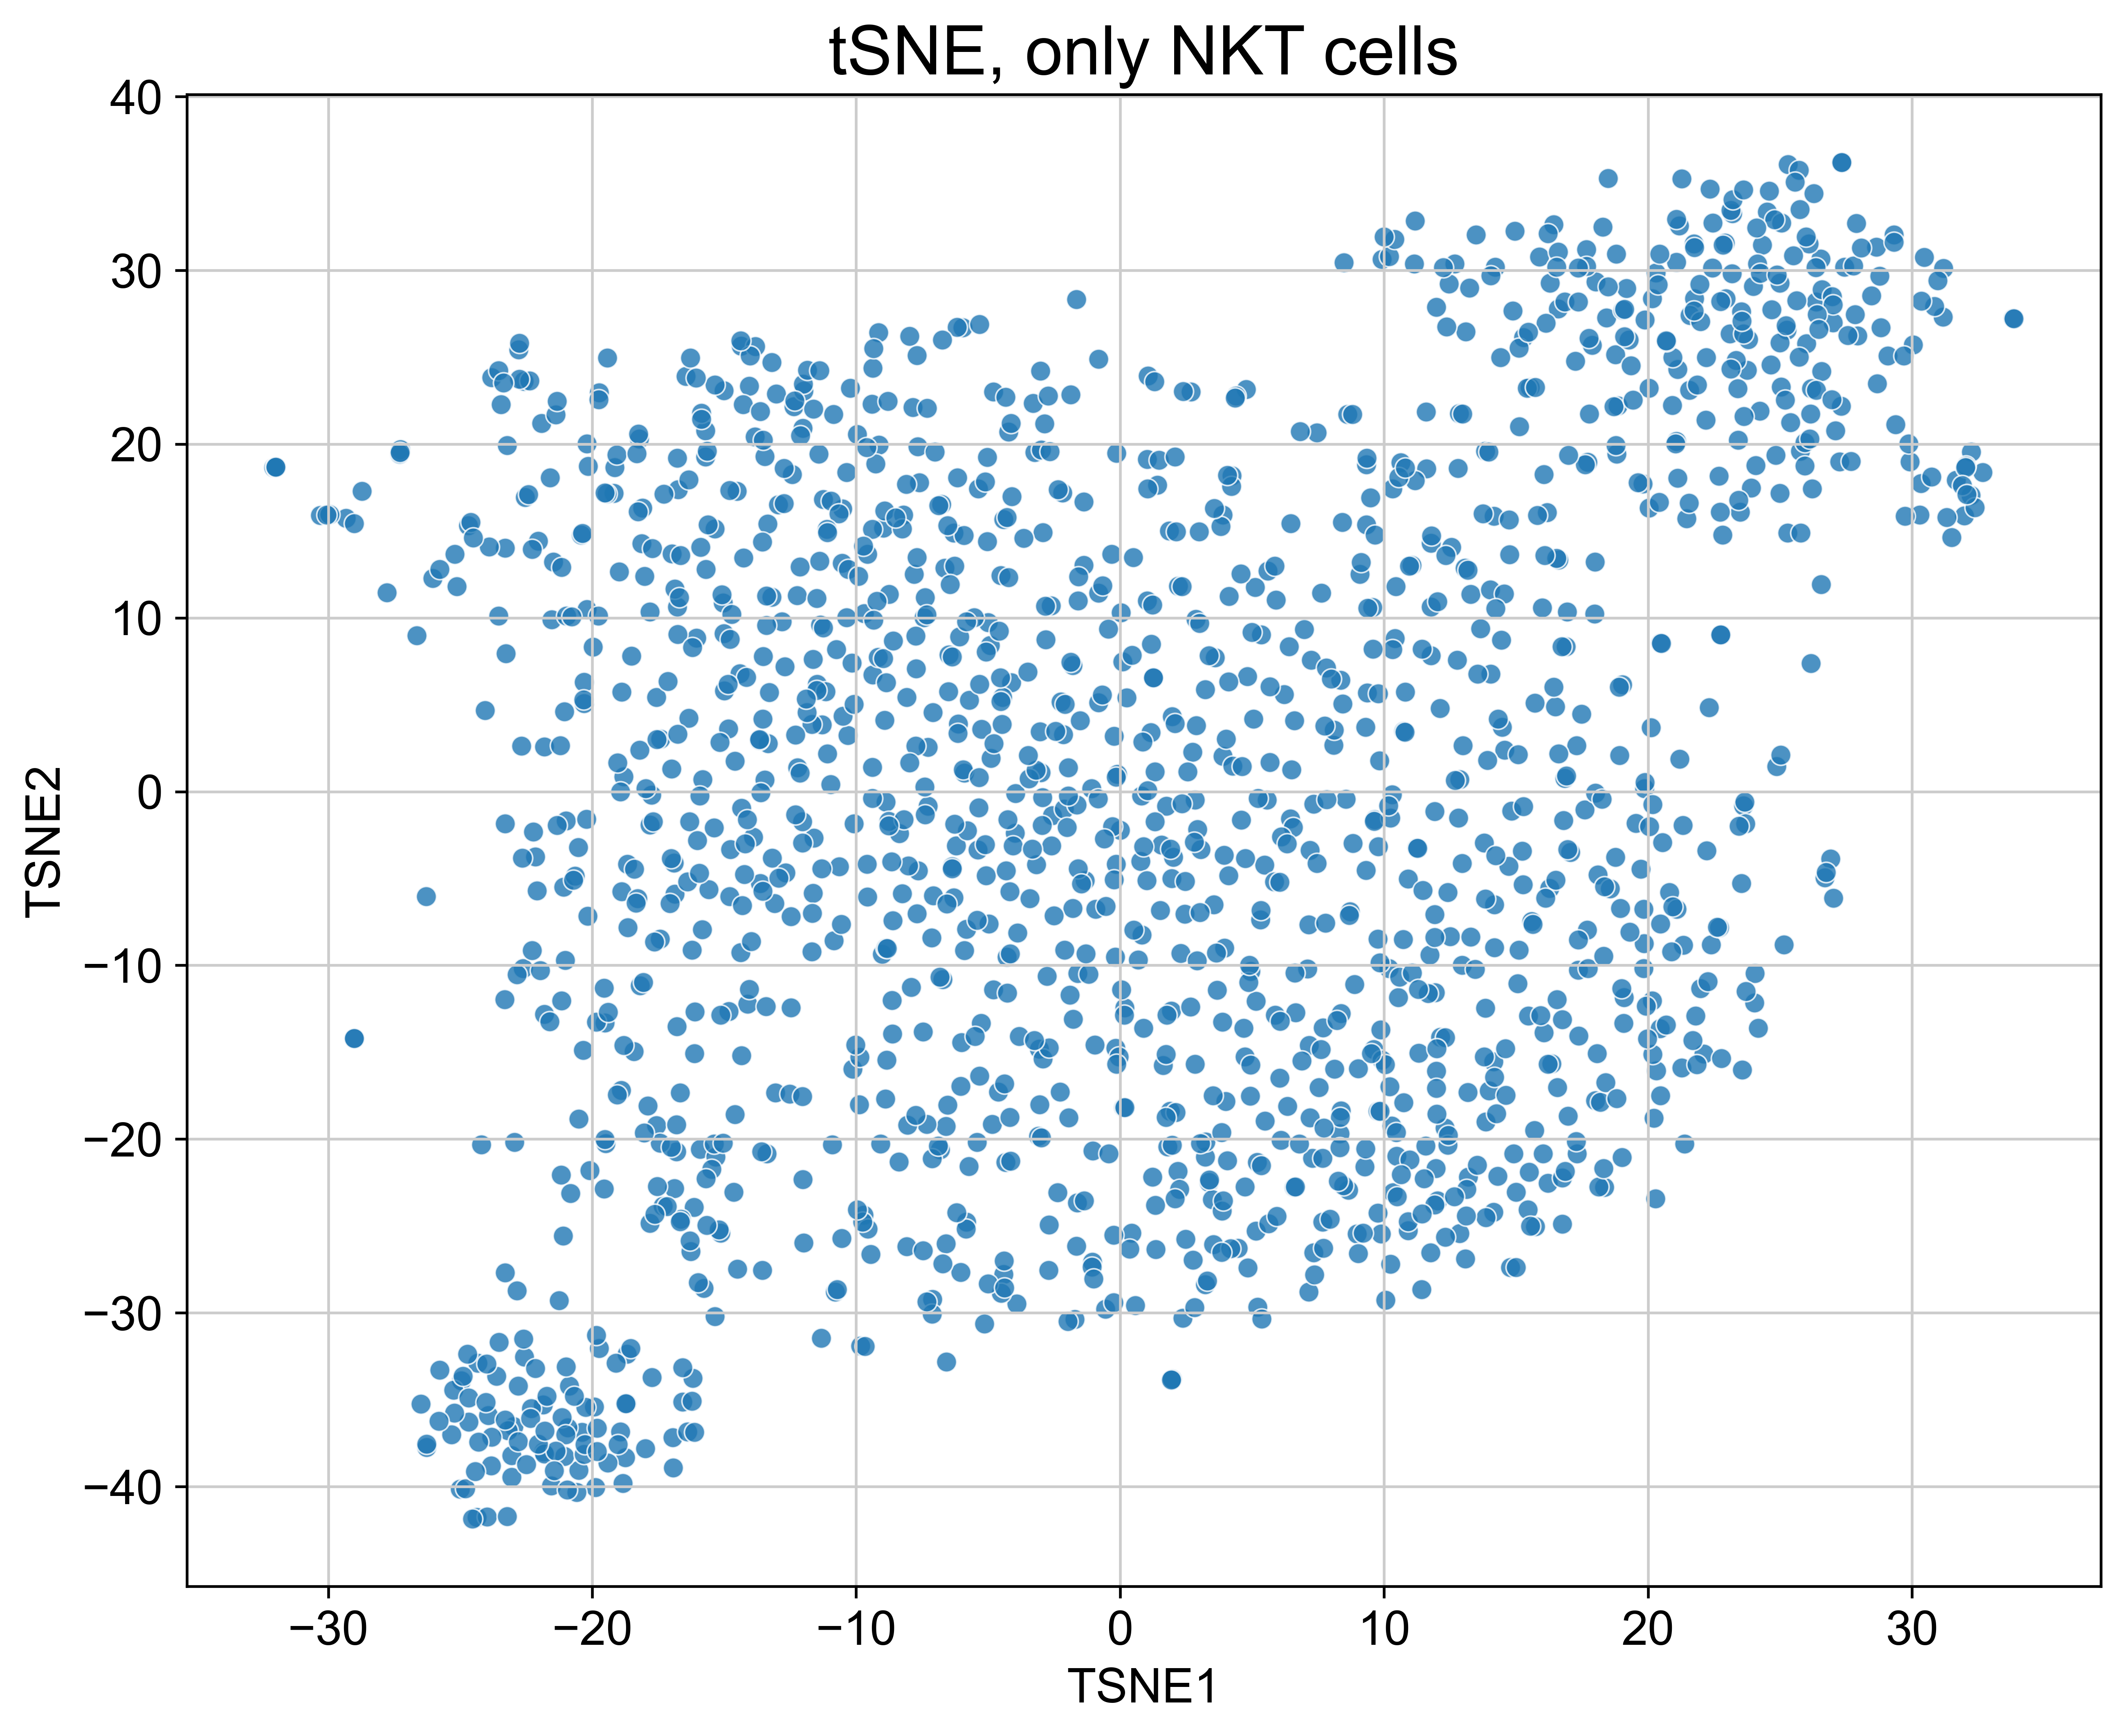

In [49]:
plt.figure(figsize=(10,8))
plt.title('tSNE, only NKT cells', fontsize=20)
sns.scatterplot(
    x = 'TSNE1', y = 'TSNE2',
    palette = sns.color_palette("husl", 5),
    data = tsnedf,
    legend = "full",
    alpha = 0.8,
)

plt.show()

In [50]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(latent1)

In [51]:
tsnedf = pd.DataFrame(tsne_results[:,:2], columns=["TSNE1", "TSNE2"])

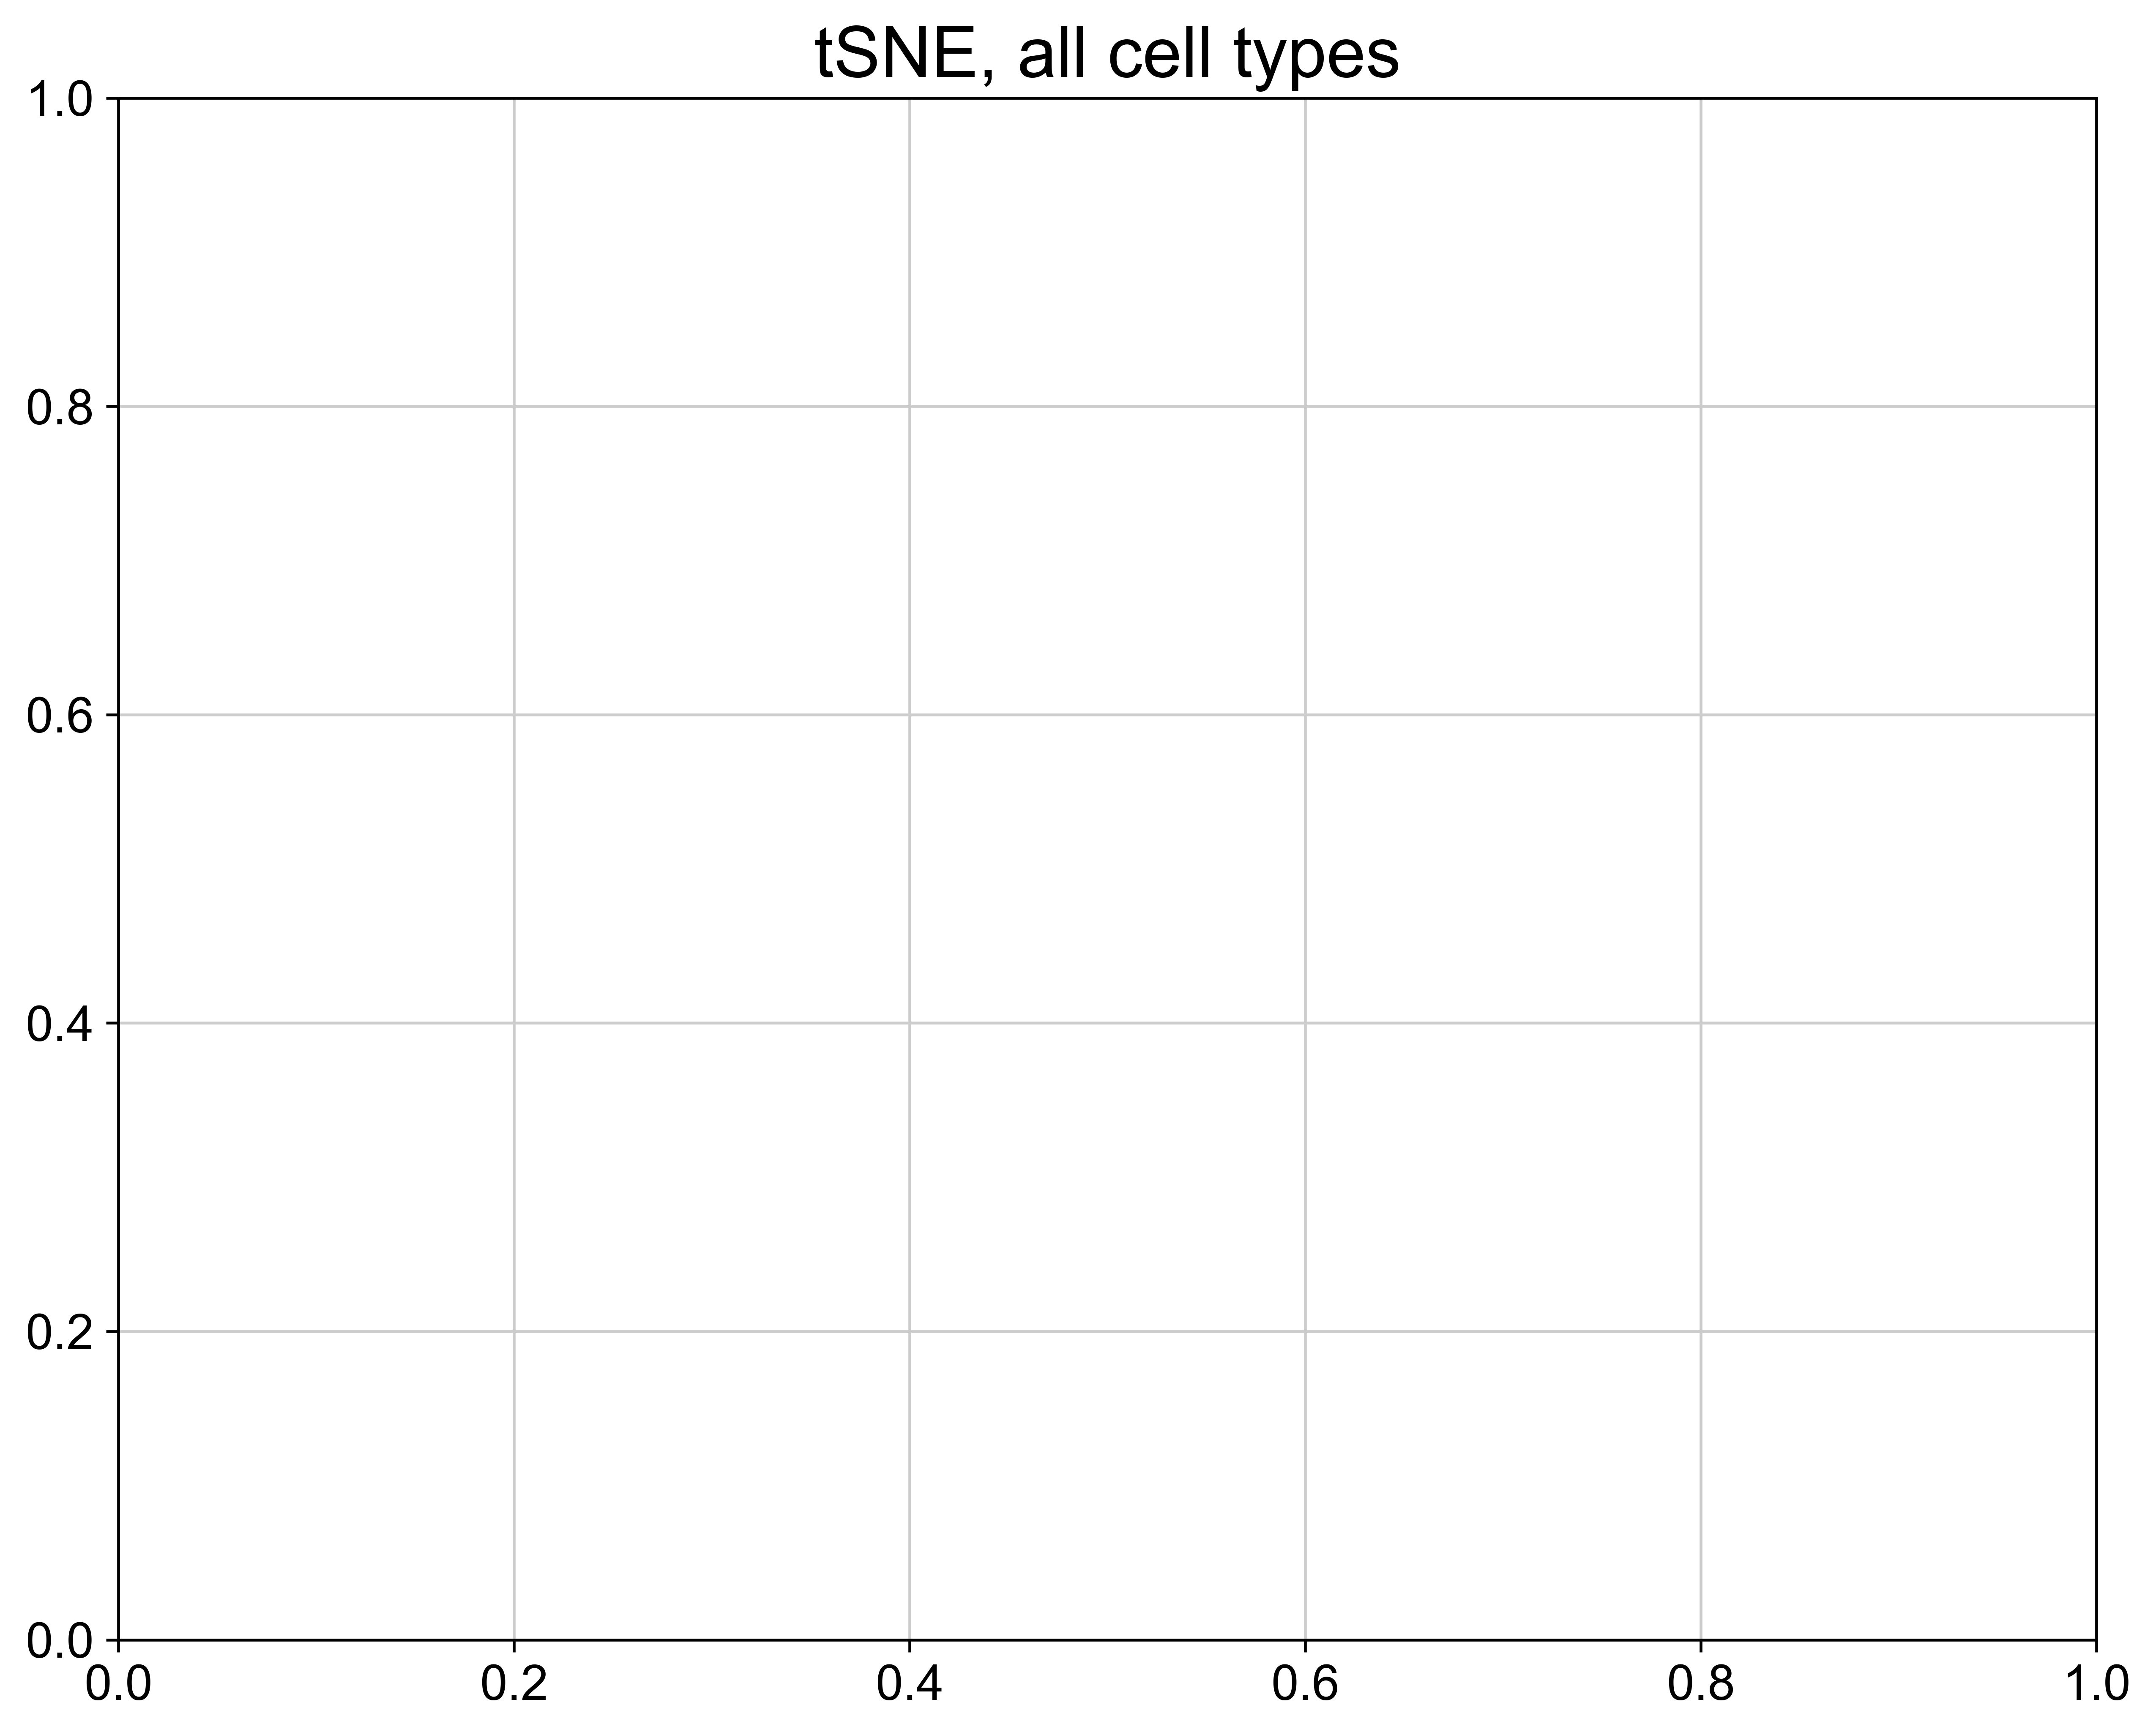

In [54]:
plt.figure(figsize=(10,8))
plt.title('tSNE, all cell types', fontsize=20)
sns.scatterplot(
    x = 'TSNE1', y = 'TSNE2',
    palette = sns.color_palette("husl", 5),
    data = tsnedf,
    hue=cell_type,
    legend = "full",
    alpha = 0.8,
)

plt.show()